# Python Introduction

Park Street Ventures LLC

Subu Raj

Mar 2020

created by Guido van Rossum, and released in 1991

from Google's python documents -
>Python is a dynamic, interpreted (bytecode-compiled) language. 
>There are no type declarations of variables, parameters, functions, or methods in source code. 
>This makes the code short and flexible, and you lose the compile-time type checking of the source code. 
>Python tracks the types of all values at runtime and flags code that does not make sense as it runs.

In [2]:
# the magic of python is in its extensive libraries
# here in this lesson, we walk through a lot of python as introduction 
# but will get into details in the next few lessons

# import basic libraries
import numpy as np
import pandas as pd

import seaborn as sns
import statsmodels.api as sm

import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt

%matplotlib inline

### You can run the following code to check the versions of the packages on your system

In [4]:
from __future__ import print_function

import IPython
print('IPython:', IPython.__version__)

import numpy
print('numpy:', numpy.__version__)

import scipy
print('scipy:', scipy.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import sklearn
print('scikit-learn:', sklearn.__version__)

import seaborn
print('seaborn', seaborn.__version__)

IPython: 7.13.0
numpy: 1.18.2
scipy: 1.4.1
matplotlib: 3.2.1
scikit-learn: 0.22.2.post1
seaborn 0.10.0


In [5]:
# Clock time to run a line of code
%timeit map(lambda x: x**2, range(0, 1000))

395 ns ± 5.17 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [6]:
# Program Flow

# Iterating over a list of Ints
for i in [1, 2, 3, 4, 5]:
    print('i = ', i)
    
# Iterating over a list of strings
mystring = ['hello', 'brave', 'new', 'world']
for item in mystring:
    print(item)

i =  1
i =  2
i =  3
i =  4
i =  5
hello
brave
new
world


In [7]:
# Handling exceptions with try/except statements

# A list of strings
letters = ['a', 'b', 'c', 'd']

# Here we iterate over a list from 0 up to an index of 9 (that's what range(10) does)
for i in range(10):
    try:
        # Print current letter
        print(letters[i])
    except IndexError as e:
        # IndexError is the particular error and only error we catch here
        print('Oops!  Something went wrong:', e)
        # Break out of loop now (so we don't keep getting this error)
        break

a
b
c
d
Oops!  Something went wrong: list index out of range


### Generators (and the `yield` statement)
* What makes a generator <b>not</b> a function:
  1. generators are just fancy iterators
  * generators are used to generate a series of values
  * use of `yield` instead of `return`
  * `yield` keeps track of the "state" of the generator
  * we can use `next()` to iterate through the series of values
  * really useful when we have infinite series

In [10]:
# A simple generator
def simple_gen():
    yield 0
    yield 1
    yield 2
    
usegen = simple_gen()

# This for loop calls the generator's next() function behind-the-scenes
for val in usegen:
    print(val)
    
# New instance of the generator since we are at the end of the series from previous for loop
usegen = simple_gen()

# use next() instead
print('using next ', next(usegen))
print('using next ', next(usegen))
print('using next ', next(usegen))

# What happens if we call next() again?
# print('using next ', next(usegen))
# we will get an error

0
1
2
using next  0
using next  1
using next  2


In [3]:
# load data from the built in data set
tips_data = sns.load_dataset("tips")
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


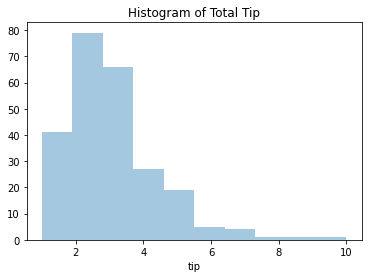

In [4]:
# plotting a histogram
# using Searborn
# with seaborn
sns.distplot(tips_data["tip"], kde = False, bins=10).set_title("Histogram of Total Tip")
plt.show()

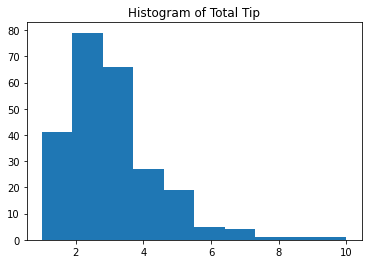

In [5]:
# using matplotlib
plt.hist(tips_data['tip'], bins=10)
plt.title("Histogram of Total Tip")
plt.show()

# Create a boxplot of the total bill amounts

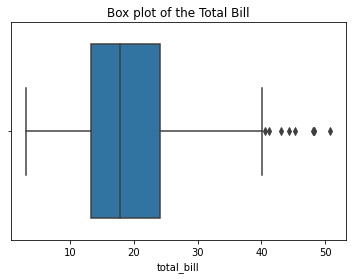

In [6]:
# with seaborn
sns.boxplot(tips_data["total_bill"]).set_title("Box plot of the Total Bill")
plt.show()

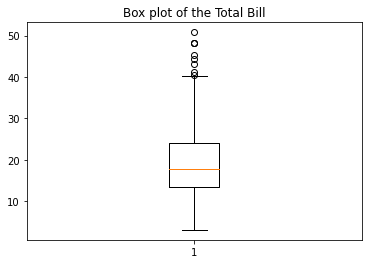

In [7]:
# with matplotlib
plt.boxplot(tips_data["total_bill"])
plt.title("Box plot of the Total Bill")
plt.show()

# Pandas Dataframe Manipulation

In [14]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
# pick columns by name
tips_data["tip"].head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [17]:
# pick rows and columns using index - rows 1 and 2 and column 0 and 5
tips_data.iloc[[1,2], [0,5]]

,total_bill,time
1,10.34,Dinner
2,21.01,Dinner


Randomness and reproducibility

In Python, we refer to randomness as the ability to generate data, strings, or, more generally, numbers at random.

However, when conducting analysis it is important to consider reproducibility. If we are creating random data, how can we enable reproducible analysis?

We do this by utilizing pseudo-random number generators (PRNGs). PRNGs start with a random number, known as the seed, and then use an algorithm to generate a psuedo-random sequence based on it.

This means that we can replicate the output of a random number generator in python simply by knowing which seed was used.

We can showcase this by using the functions in the python library random.

In [18]:
import random as r
r.seed(1234)
r.random()

0.9664535356921388

In [19]:
r.seed(1234)
r.random()

0.9664535356921388

In [20]:
# uniform distribution
r.uniform(25,50)

mu = 0

sigma = 1

r.normalvariate(mu, sigma)

1.8038006216944658

## List comprehension
List comprehensions allow you to easy create lists. They follow the format:
```
my_list = [expression(i) for i in input list]
```
For example, if you wanted to plot the sin curve from -$\pi$ to $\pi$:

In [21]:
x = np.linspace(-np.pi, np.pi, 100) # create a list of 100 equally spaced points between -pi and pi
x

array([-3.14159265, -3.07812614, -3.01465962, -2.9511931 , -2.88772658,
       -2.82426006, -2.76079354, -2.69732703, -2.63386051, -2.57039399,
       -2.50692747, -2.44346095, -2.37999443, -2.31652792, -2.2530614 ,
       -2.18959488, -2.12612836, -2.06266184, -1.99919533, -1.93572881,
       -1.87226229, -1.80879577, -1.74532925, -1.68186273, -1.61839622,
       -1.5549297 , -1.49146318, -1.42799666, -1.36453014, -1.30106362,
       -1.23759711, -1.17413059, -1.11066407, -1.04719755, -0.98373103,
       -0.92026451, -0.856798  , -0.79333148, -0.72986496, -0.66639844,
       -0.60293192, -0.53946541, -0.47599889, -0.41253237, -0.34906585,
       -0.28559933, -0.22213281, -0.1586663 , -0.09519978, -0.03173326,
        0.03173326,  0.09519978,  0.1586663 ,  0.22213281,  0.28559933,
        0.34906585,  0.41253237,  0.47599889,  0.53946541,  0.60293192,
        0.66639844,  0.72986496,  0.79333148,  0.856798  ,  0.92026451,
        0.98373103,  1.04719755,  1.11066407,  1.17413059,  1.23

In [22]:
# Here's our list comprehension. For each point in x, we want y=sin(x)
y = [np.sin(value) for value in x] 
# let looks at just the first 5 elements of y
y[:5]

[-1.2246467991473532e-16,
 -0.06342391965656484,
 -0.12659245357374935,
 -0.1892512443604105,
 -0.2511479871810793]

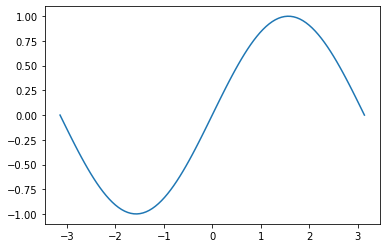

In [23]:
plt.plot(x,y)
plt.show()

# Lists vs numpy arrays

Lists can have multiple datatypes. For example one element can be a string and another can be and int and another a float. Lists are defined by using the square brackets: \[ \], with elements separated by commas, ','.
Ex:
```
my_list = [1, 'Colorado', 4.7, 'rain']
```
Lists are indexed by position. Remember, in Python, the index starts at 0 and ends at length(list)-1. So to retrieve the first element of the list you call:
```
my_list[0]
```

Numpy arrays  np.arrays differ from lists is that the contain only 1 datatype. For example all the elements might be ints or strings or floats or objects. It is defined by np.array(object), where the input 'object' can be for example a list or a tuple.    
Ex:
```
my_array = np.array([1, 4, 5, 2])
```
or 
```
my_array = np.array((1, 4, 5, 2))
```

Lists and numpy arrays differ in their speed and memory efficiency. An intuitive reason for this is that python lists have to store the value of each element and also the type of each element (since the types can differ). Whereas numpy arrays only need to store the type once because it is the same for all the elements in the array. 

You can do calculations with numpy arrays that can't be done on lists.  
Ex:
```
my_array/3
```
will return a numpy array, with each of the elements divided by 3. Whereas:
```
my_list/3
```
Will throw an error.

You can appened items to the end of lists and numpy arrays, though they have slightly different commands. It is almost of note that lists can append an item 'in place', but numpy arrays cannot.

```
my_list.append('new item')
np.append(my_array, 5) # new element must be of the same type as all other elements
```

In [24]:
python_list = [1, 2, 3]
np_array = np.array([1, 2, 3])

In [25]:
# Both indexed by position
python_list[0]

1

In [26]:
np_array[0]

1

In [24]:
np_array/3

array([0.33333333, 0.66666667, 1.        ])

In [27]:
# the below code will result in an error
# python_list/3

In [28]:
python_list.append(5) # inplace
python_list

[1, 2, 3, 5]

In [29]:
np_array = np.append(np_array, 5) # cannot do inplace because not always contiguous memory
np_array

array([1, 2, 3, 5])

### Dictionaries  
Store key-values pairs and are indexed by the keys.
denoted with \{key1: value1, key2: value2\}. The keys must be unique, the values do not need to be unique.  
Can be used for many tasks, for example, creating DataFrames and changing column names. 

In [30]:
dct = {'thing 1': 2, 'thing 2': 1}
dct['thing 1']

2

In [31]:
# adding to a dictionary
dct['new thing'] = 'woooo'
dct

{'thing 1': 2, 'thing 2': 1, 'new thing': 'woooo'}

In [32]:
# Create DataFrame
df = pd.DataFrame({'col1':range(3), 'col2':range(3,6)})
df

,col1,col2
0,0,3
1,1,4
2,2,5


In [33]:
# Change column names
df.rename(columns={'col1': 'apples', 'col2':'oranges'})

,apples,oranges
0,0,3
1,1,4
2,2,5


In [34]:
#example of using class in python
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age

  def myfunc(self):
    print("Hello my name is " + self.name)

p1 = Person("John", 36)
p1.myfunc()

Hello my name is John


# functions and lambda functions

In [35]:
def sum_x_y(x, y): # don't need comments if immediately clear what the function does
    out = x + y
    return out

sum_x_y(4, 6)

10

In [37]:
def get_max(x):
    current_max = x[0]
    for i in x[1:]:
        if i > current_max:
            current_max = i
    return current_max

In [38]:
get_max(np.random.choice(400, 100)) 

398

### lambda functions

There are also know as anonymous functions because they are unnamed. This function can have any number of arguments but only one expression. Lambda functions, unlike defined functions, always return a variable.
The format of a lambda function is  
```
lambda arguments: expression  
```

They can look similar to a mathematical expression for evauating a function.  
For example:
```
(lambda x: x**2)(3)
```
Is the same as mathmatically writing  
$f(x) = x^2$ an then evauluating the function $f$ at $x=3$,  
$f(3) = 9$

In [39]:
(lambda x: x**2)(3)

9

<function matplotlib.pyplot.show(*args, **kw)>

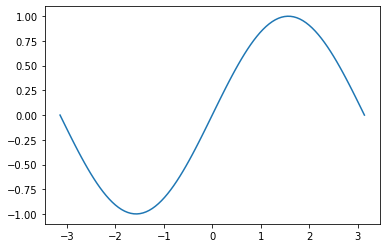

In [40]:
# another way
f = lambda x: np.sin(x)
x = np.linspace(-np.pi, np.pi, 100)
y = [f(i) for i in x]
plt.plot(x, y)
plt.show

This tutorial is going to demonstrate how to load data, clean/manipulate a dataset, and construct a confidence interval for the difference between two population proportions and means.

We will use the 2015-2016 wave of the NHANES data for our analysis.

*Note: We have provided a notebook that includes more analysis, with examples of confidence intervals for one population proportions and means, in addition to the analysis I will show you in this tutorial.  I highly recommend checking it out!

For our population proportions, we will analyze the difference of proportion between female and male smokers.  The column that specifies smoker and non-smoker is "SMQ020" in our dataset.

For our population means, we will analyze the difference of mean of body mass index within our female and male populations.  The column that includes the body mass index value is "BMXBMI".

Additionally, the gender is specified in the column "RIAGENDR".

In [41]:
# da = pd.read_csv(file_name)
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Investigating and Cleaning Data

In [43]:
tips_data["smoker"] = tips_data.smoker.replace({"No": 1, "Yes": 2})
tips_data["smoker"]

0      1
1      1
2      1
3      1
4      1
      ..
239    1
240    2
241    2
242    1
243    1
Name: smoker, Length: 244, dtype: int64